Ajuste de um modelo de regressão linear simples que relaciona o o rendimento da gasolina **(y)** (Milhas por litro) e a cilindrada do motor **(x1)** (polegadas cúbicas).  Foi utilizado o dataset B.3, que contém dados sobre o rendimento de Gasolina, em milhas, de 32 automóveis diferentes.


In [74]:
# importação dos módulos e leitura dos dados

import pandas as pd
from tabulate import tabulate
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


dados = pd.read_csv("data-table-B3.csv", decimal=",")
dados.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,18.90,350.0,165,260.0,8.00,2.56,4,3,200.3,69.9,3910,1
1,17.00,350.0,170,275.0,8.50,2.56,4,3,199.6,72.9,3860,1
2,20.00,250.0,105,185.0,8.25,2.73,1,3,196.7,72.2,3510,1
3,18.25,351.0,143,255.0,8.00,3.00,2,3,199.9,74.0,3890,1
4,20.07,225.0,95,170.0,8.40,2.76,1,3,194.1,71.8,3365,0


In [75]:
# verificando presença de NaN
dados.isna().sum()

y      0
x1     0
x2     0
x3     2
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
dtype: int64

In [4]:
# separando nossa base em treino e teste, e selecionando as variáveis

X_train, X_test, y_train, y_test = train_test_split(dados['x1'], dados['y'], train_size=0.875,random_state = 42)

## Descrição do banco de dados


In [5]:
# verificando as principais medidas descritivas
# temos 12 features e ajustaremos o modelo com base na feature x1

dados.filter(["y", "x1"]).describe()

,y,x1
count,32.000000,32.000000
mean,20.223125,285.043750
std,6.318289,117.240214
min,11.200000,85.300000
25%,16.477500,211.500000
50%,19.300000,318.000000
75%,21.655000,353.250000
max,36.500000,500.000000


## Análise Exploratória Básica

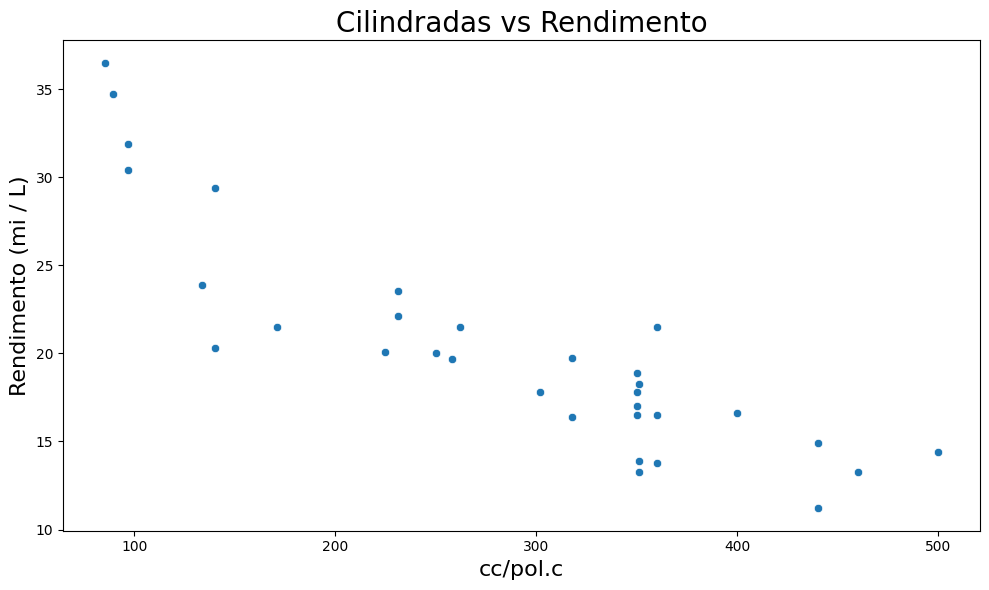

In [6]:
# criando um gráfico de dispersão para as variáveis x1 e y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x="x1", y="y")

plt.title("Cilindradas vs Rendimento", size=20, ha="center")
plt.xlabel("cc/pol.c", size=16)
plt.ylabel("Rendimento (mi / L)", size=16)
plt.tight_layout()


plt.show()

A partir do gráfico de dispersão acima parece que existe uma relação linear entre as variáveis x1 e y. Essa relação pode ser verificada a partir do coeficiente de Pearson ρ.


In [76]:
correlacao, p_valor = stats.pearsonr(dados["x1"], dados["y"])

print("Correlação:", correlacao)
print("P-valor:", p_valor)

Correlação: -0.8787896462296565
P-valor: 3.7430411752445877e-11


O teste de correlação de Person resultou em um ρ = − 0.87 o que indica uma forte correlação negati entre as variáveis.

O objetivo é estimar a influência de x1 sobre y, ou seja, como y varia em relação às variações em x1.

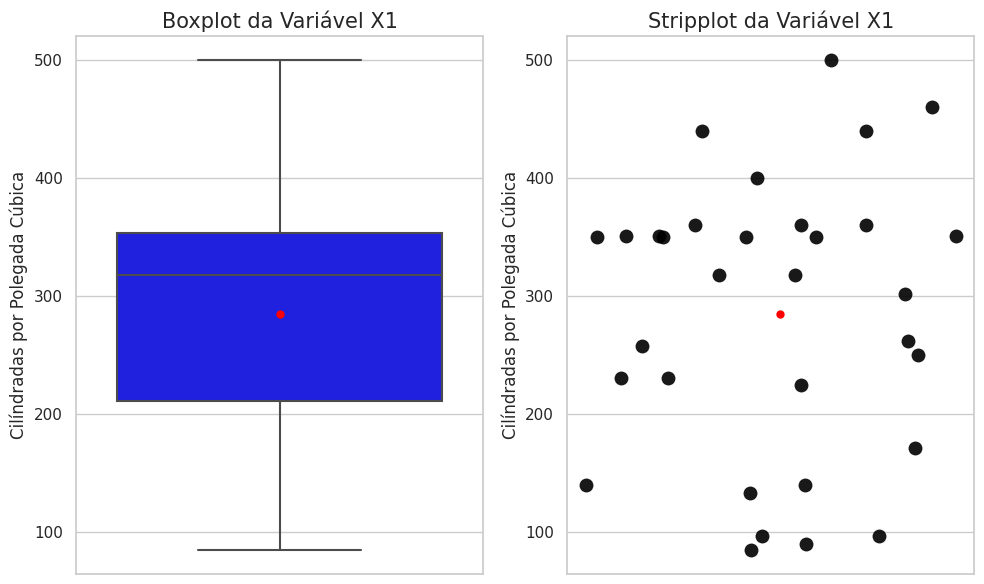

In [77]:
# visualizando a distribuição de valores de x1
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y="x1", data=dados, color="blue")
plt.title("Boxplot da Variável X1", size=15, ha="center")
plt.xlabel("")
plt.ylabel("Cilíndradas por Polegada Cúbica")
plt.plot(dados["x1"].mean(), marker="o", markersize=5, color="red", fillstyle="full")

plt.subplot(1, 2, 2)
sns.stripplot(y="x1", data=dados, color="black", size=10, alpha=0.9, jitter=True)
plt.title("Stripplot da Variável X1", size=15, ha="center")
plt.xlabel("")
plt.ylabel("Cilíndradas por Polegada Cúbica")
plt.plot(dados["x1"].mean(), marker="o", markersize=5, color="red", fillstyle="full")

plt.tight_layout()
plt.show()

Podemos perceber a partir do boxplot acima que 50% dos carros tem menos de 318 cilíndradas.


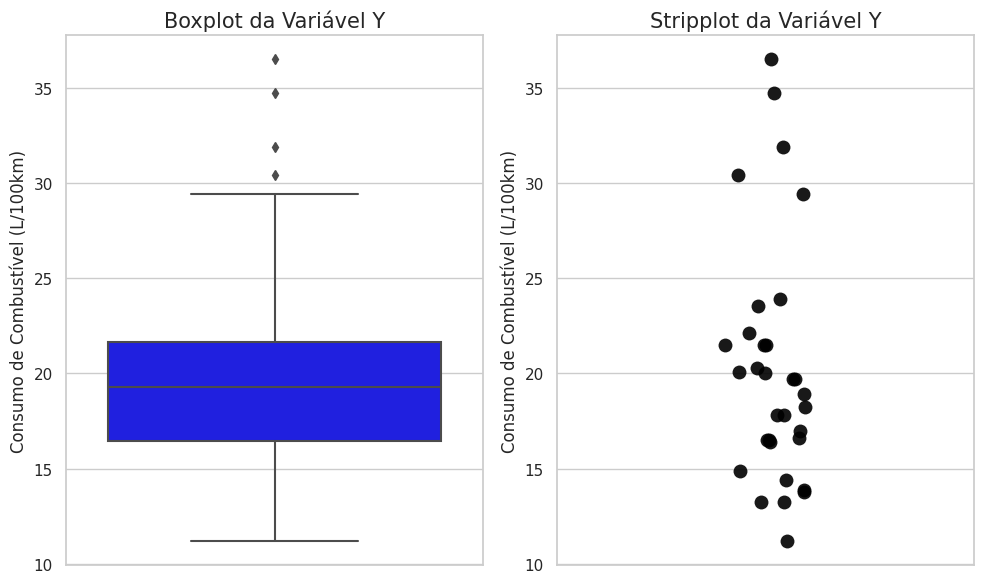

In [78]:
# visualizando a distribuição de valores de y
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y="y", data=dados, color="blue")
plt.title("Boxplot da Variável Y", size=15, ha="center")
plt.xlabel("")
plt.ylabel("Consumo de Combustível (L/100km)")


plt.subplot(1, 2, 2)
sns.stripplot(y="y", data=dados, color="black", size=10, alpha=0.9, jitter=True)
plt.title("Stripplot da Variável Y", size=15, ha="center")
plt.xlabel("")
plt.ylabel("Consumo de Combustível (L/100km)")

plt.tight_layout()
plt.show()

Pelo boxplot acima, percebemos que os dados da variável y parecem seguir uma distribuição normal - o que será confirmado com a análise de um histograma. Ainda, destaca-se quatro outliers, cujo rendimento é superior a 30 mi/L.

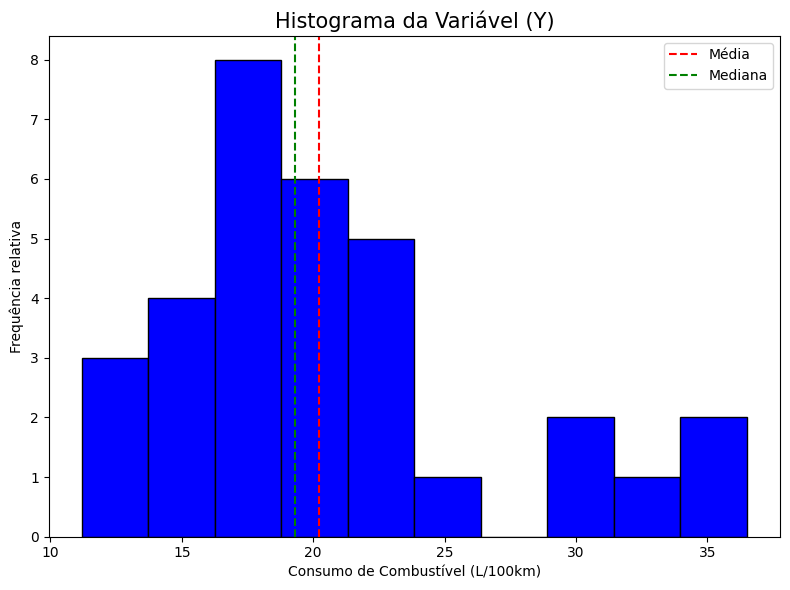

In [10]:
# visualizando a distribuição de valores de y por meio de um histograma
plt.figure(figsize=(8, 6))
plt.hist(dados["y"], bins=10, color="blue", edgecolor="black")

# adicionando linhas de média e mediana
plt.axvline(dados["y"].mean(), color="red", linestyle="--", label="Média")
plt.axvline(dados["y"].median(), color="green", linestyle="--", label="Mediana")

plt.title("Histograma da Variável Y", size=15, ha="center")
plt.xlabel("Consumo de Combustível (L/100km)")
plt.ylabel("Frequência relativa")
plt.legend()
plt.tight_layout()
plt.show()

O histograma acima representa a distribuição da variável y. Fica claro, portanto, que os dados da variável resposta se assemelham a uma distribuição normal, apesar dos outliers.

In [11]:
outliers = dados[dados['y'] > 30][['y', 'x1']]

print(outliers)

       y    x1
8   34.7  89.7
9   30.4  96.9
11  36.5  85.3
23  31.9  96.9


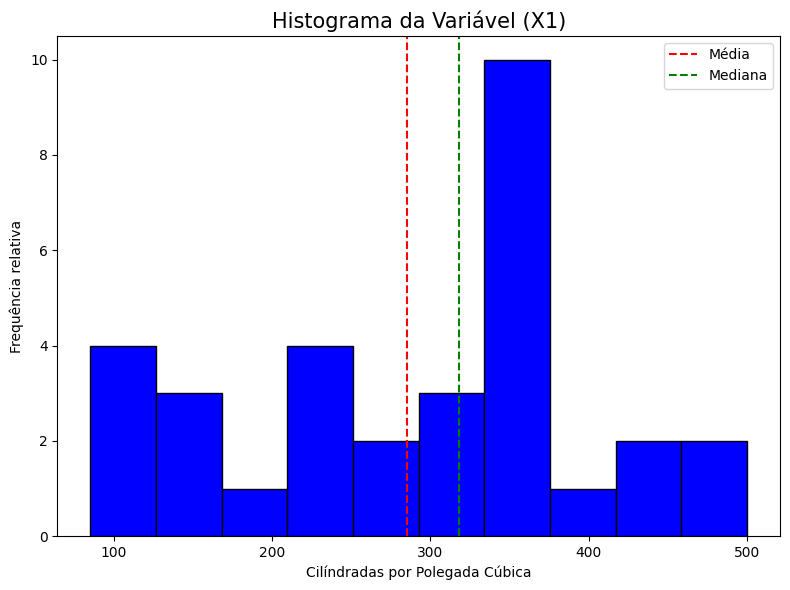

In [12]:
# visualizando a distribuição de valores de x1 por meio de um histograma
plt.figure(figsize=(8, 6))
plt.hist(dados["x1"], bins=10, color="blue", edgecolor="black")

# adicionando linhas de média e mediana
plt.axvline(dados["x1"].mean(), color="red", linestyle="--", label="Média")
plt.axvline(dados["x1"].median(), color="green", linestyle="--", label="Mediana")

plt.title("Histograma da Variável (X1)", size=15, ha="center")
plt.xlabel("Cilíndradas por Polegada Cúbica")
plt.ylabel("Frequência relativa")
plt.legend()
plt.tight_layout()
plt.show()

O histograma da variável x1 não apresenta uma distribuição bem definida, entretanto, destaca-se maior frequência para os valores em torno de 350 cilíndradas.


In [13]:
moda = dados["x1"].mode()
print(moda)

0    350.0
Name: x1, dtype: float64


## Regressão linear

Cálculo de $S_{XX}$,$S_{YY}$ e $S_{XY}$

In [14]:
x_barra = X_train.mean()
y_barra = y_train.mean()

Sxx = np.sum((X_train - x_barra)**2)
Syy = np.sum((y_train - y_barra)**2)
Sxy = np.sum((X_train - x_barra) * (y_train - y_barra))


results = pd.DataFrame({"Sxx": [Sxx], "Syy": [Syy], "Sxy": [Sxy]})
print(results)

             Sxx          Syy           Sxy
0  376108.697143  1069.576186 -17504.592571


### Estimação dos parâmetros
$\beta_{1} = S_{XY} /S_{XX}$

Calculando o valor do coeficiente angular $\beta_{1}$


In [15]:
b1_est = Sxy / Sxx

print(b1_est)

-0.046541312935339564


Calculando o valor do intercepto $\beta_{0}$

In [16]:
\b0_est = y_barra - b1_est * x_barra

print(b0_est)

33.53273189139759


Calculando o estimador de $\sigma^2$ não viesado.
Tal estimador é obtido através da soma do quadrado dos resíduos, definido pela variável QMres.

In [17]:
# Soma do quadrado da regressão
SQreg = b1_est * Sxy

# Soma do quadrado total
SQtotal = np.sum((y_train -  y_barra) ** 2)

# Diferença entre a soma do quadrado da regressão e a soma do quadrado total
SQres = SQtotal - SQreg

# Soma do quadrado dos resíduos
n = len(y_train)
QMres = SQres / (n - 2)

# Coeficiente de determinação
Coef_Det = SQreg/SQtotal
print(Coef_Det)

0.7616911553882553


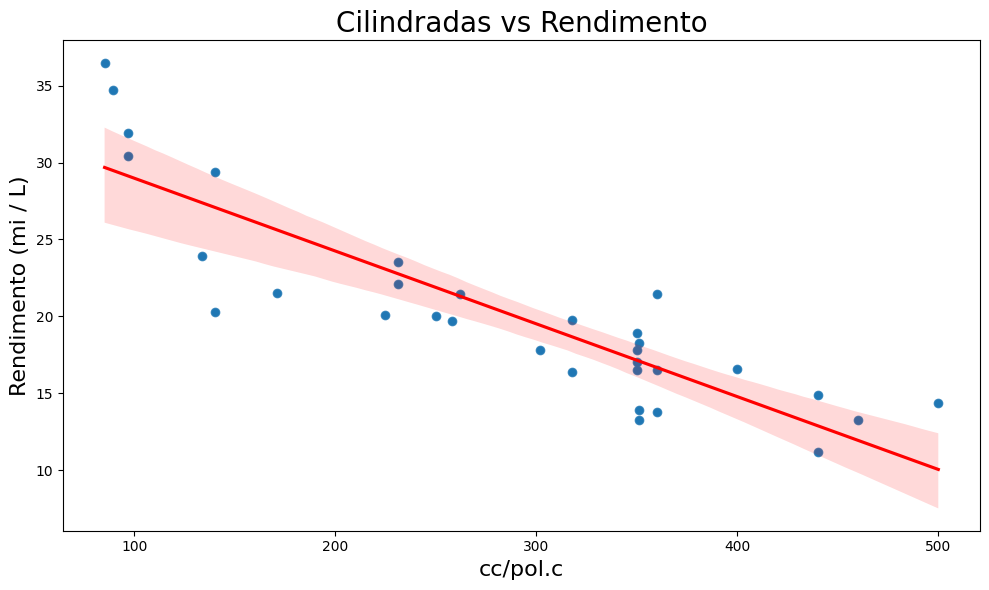

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x="x1", y="y")

# adiciona a linha de regressão linear
sns.regplot(data=dados, x="x1", y="y", line_kws={"color": "red"})

plt.title("Cilindradas vs Rendimento", size=20, ha="center")
plt.xlabel("cc/pol.c", size=16)
plt.ylabel("Rendimento (mi / L)", size=16)
plt.tight_layout()


plt.show()

Conforme revelado no resultado do coeficiente de determinação, o qual mostra a
proporção em que a variação do rendimento de gasolina é explicada pelas cilindradas do motor, cujo resultado foi de aproximadamente 0.78, apresenta um valor próximo de 1, indicando assim uma boa correlação linear entre as variáveis dado que segundo esta análise, aproximadamente 78% da variação do
rendimento de gasolina é explicada pelas cilindradas do motor.


Pela estimação dos parâmetros temos que a reta ajustada é, aproximadamente:
$\hat{Y_{i}} = 24.35 − 0.018X_i$

O cálculo de $\hat{Y}$ pode ser realizado utilizando o modelo de regressão linear simples, em que a variabilidade de interesse é dada em função de uma única covariável - no caso, x1

In [19]:
y_pred = b0_est + b1_est*X_train

Os resíduos se dão pelo desvio entre as observações e os valores preditos, sendo uma medida de variabilidade na variável resposta onde qualquer desvio relativo a suposição dos erros deveria aparecer. Analisá-los nos permite um discernimento maior em relação a quão adequado é o modelo. Fazendo uso do cálculo de ypred feito anteriormente, salvamos nossos resíduos em uma variável res abaixo.

In [20]:
res = y_train - y_pred

Text(0.5, 1.0, 'Histograma dos resíduos')

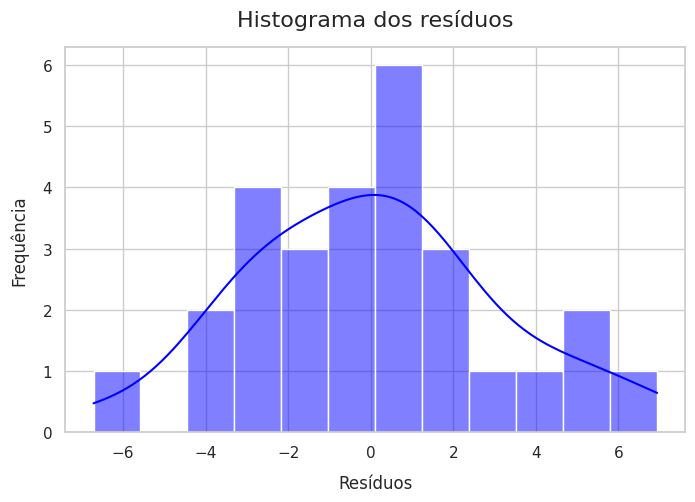

In [21]:
# visualizando o comportamento dos resíduos

n_res = len(res)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(res, kde=True, color='blue', bins=12)
plt.xlabel("Resíduos", labelpad=10)
plt.ylabel("Frequência", labelpad=10)
plt.title("Histograma dos resíduos", fontsize=16, pad=15)


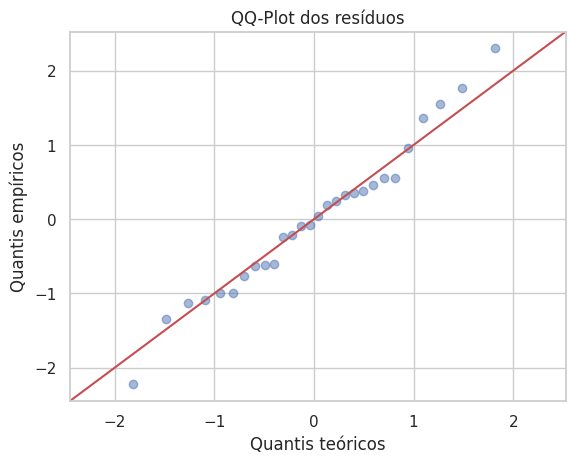

In [22]:
import statsmodels.graphics.gofplots as sm_graphics

fig = sm_graphics.qqplot(res, line='45', fit=True, alpha=0.5)
plt.title('QQ-Plot dos resíduos')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis empíricos')

plt.show()

Desse modo, é possível observar que os resíduos tendem a se aproximar cada vez mais da normal.

### Testes de hipótese para $\beta_{0}$ e $\beta_{1}$

Para realizarmos nossos testes de hipóteses, é necessário o estimador do parâmetro $\sigma^2$ do nosso modelo. Tal estimador não viesado é obtido através da soma do quadrado dos resíduos, definido pela variável QMres.

A partir disso, podemos prosseguir com nossos testes de hipóteses com decisão de rejeitar ou não H0, uma vez que este representa o parâmetro se igualar a 0 estatisticamente caso não seja rejeitado, descrevendo a significância da contribuição do mesmo.

In [24]:
# Erro padrão de b1
dp_b1 = np.sqrt(QMres / Sxx)

# Valor-t de b1
t0_b1 = b1_est / dp_b1

In [26]:
# Nível de significância
alpha = 0.05

# Quantis t para o teste bicaudal
t1 = stats.t.ppf(alpha / 2, n - 2)
t2 = stats.t.ppf(1 - alpha / 2, n - 2)

# Teste de hipótese
if t0_b1 < t1 or t0_b1 > t2:
    print("Rejeita-se H0")
else:
    print("Não rejeita-se H0")

Rejeita-se H0


Como H0 é rejeitado, temos que $\beta_1$ é diferente de zero.

In [28]:
dp_b0 = np.sqrt(QMres * ((1 / n) + (x_barra ** 2 / Sxx)))

t0_b0 = b0_est / dp_b0

print("dp_b0:", dp_b0)
print("t0_b0:", t0_b0)

dp_b0: 1.5553016099748649
t0_b0: 21.560275946695324


In [79]:
# Nível de significância
alpha = 0.05

# Quantis t para o teste bicaudal
t1 = stats.t.ppf(alpha / 2, n - 2)
t2 = stats.t.ppf(1 - alpha / 2, n - 2)

# Teste de hipóteses
if t0_b1 < t1 or t0_b1 > t2:
    print("Rejeita-se H0")
else:
    print("Não rejeita-se H0")

Rejeita-se H0


Como H0 é rejeitado, temos que $\beta_0$ é diferente de zero.

### Intervalos de Confiança para $(\beta_0, \beta_1, \sigma^2)$ e $E(Y)$.

IC para $\beta_1$

In [30]:
b1_min = b1_est - t2 * dp_b1

b1_max = b1_est - t1 * dp_b1

IC_b1_est = np.c_[b1_min, b1_max]

print(IC_b1_est)

[[-0.05703568 -0.03604695]]


Cada incremento em polegada cúbica na cilindrada do motor aumenta o consumo em milhaspor litro em -0.057, com uma margem de erro de aproximadamente 0.036 para mais ou para menos.

IC para $\beta_0$

In [31]:
b0_min = b0_est - t2 * dp_b0

b0_max = b0_est - t1 * dp_b0

IC_b0_est = np.c_[b0_min, b0_max]

print(IC_b0_est)

[[30.33576365 36.72970014]]


IC para $\sigma^2$

In [32]:
t1_sig = stats.chi2.ppf(alpha / 2, n - 2)
t2_sig = stats.chi2.ppf(1 - alpha / 2, n - 2)

sig_min = SQres / t2_sig

sig_max = SQres / t1_sig

IC_sig_est = np.c_[sig_min, sig_max]

print(IC_sig_est)

[[ 6.07991868 18.41167397]]


Calculando intervalo de confiança para a esperança de y, ou seja, o valor médio da variável resposta para para um valor particular da covariável $\mu(y|x_0).$
Usaremos $X_0$ como sendo o proprio X.

In [34]:
X0 = x_barra

# Predição do valor médio para X0
v_medio = y_barra + b1_est * (X0 - x_barra)

# Erro padrão da predição
auxiliar = np.sqrt(QMres * ((1 / n) + ((X0 - x_barra) / Sxx)))

print("v_medio:", v_medio)
print("auxiliar:", auxiliar)

v_medio: 20.42071428571428
auxiliar: 0.5917118315032626


In [35]:
v_medio_min = v_medio - t2 * auxiliar

v_medio_max = v_medio - t1 * auxiliar

IC_v_medio = np.c_[v_medio_min, v_medio_max]

print(IC_v_medio)

[[19.2044332  21.63699537]]


Calculando o intervalo de predição - em que 95% das vezes iria conter o verdadeiro valor predito considerando a nova informação de x1.

In [80]:
Y0_est = b0_est + b1_est * X_test

# Erro padrão da predição
auxiliar_y0 = np.sqrt(QMres * ((1 + (1 / n) + ((X_test - x_barra) / Sxx))))

In [81]:
Y0_est_min = Y0_est - t2 * auxiliar_y0

Y0_est_max = Y0_est - t1 * auxiliar_y0

IC_Y0_est = np.c_[Y0_est_min, Y0_est_max]

In [82]:
IC_Y0_est = pd.DataFrame({
    "Y0_est_min": Y0_est_min,
    "Y0_est_max": Y0_est_max,
    "y": y_test
})


print(IC_Y0_est.to_string())

    Y0_est_min  Y0_est_max      y
29   10.646275   23.747188  13.27
15   12.927211   26.027300  17.80
24   20.468266   33.565631  29.40
17    6.503350   19.605759  14.89


Como podemos ver, o valor de y real estava dentro do intervalo para as quatro observações.


### Análise de Variâcia

Testando a significancia da regressão através da Análise de Variância (ANOVA), nesse caso testariamos se $\beta_1 = 0$.


In [83]:
print('Soma do quadrado da Regressão = ',SQreg)
print('Soma do quadrado total = ',SQtotal)
print('Soma do quadrado do resíduo = ',SQres)

Soma do quadrado da Regressão =  814.6867206724773
Soma do quadrado total =  1069.5761857142857
Soma do quadrado do resíduo =  254.8894650418083


In [47]:
QMreg = SQreg

F_0 = QMreg/QMres
print(F_0)

83.10211932066338


Quantil da Distribuição F-Snedecor

In [84]:
f1 = stats.f.sf(F_0, 1,n-2)

print("f1:", f1)

if F_0 > f1:
    print("Rejeita-se H0")


f1: 1.404357066416546e-09
Rejeita-se H0


### Usando funções de módulos no Python para checagem dos coeficientes do nosso modelo.

In [53]:
import statsmodels.formula.api as smf

fit = smf.ols('y ~ x1', data=dados).fit()


print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     101.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           3.74e-11
Time:                        13:52:40   Log-Likelihood:                -80.215
No. Observations:                  32   AIC:                             164.4
Df Residuals:                      30   BIC:                             167.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7227      1.444     23.355      0.0

In [55]:
from statsmodels.stats.anova import anova_lm

# Perform the ANOVA
anova = anova_lm(fit)

print(anova)

            df      sum_sq     mean_sq           F        PR(>F)
x1         1.0  955.719710  955.719710  101.735668  3.743041e-11
Residual  30.0  281.824378    9.394146         NaN           NaN


In [57]:
from scipy.stats import shapiro
residuals = fit.resid

# Perform the Shapiro-Wilk test for normality
shapiro_test_result = shapiro(residuals)

# Print the test results
print(shapiro_test_result)

ShapiroResult(statistic=0.9871749877929688, pvalue=0.9610217213630676)


A hipótese nula do Teste de Shapiro-Wilk é de que não há diferença entre a nossa distribuição dos dados
e a distribuição normal. O valor-p maior do que 0.01 nos dá uma confiança estatística para afirmar que as
distribuição dos nossos resíduos não difere da distribuição normal.
Dessa forma, nossos dados satisfazem todas as premissas da ANOVA e, portanto, os resultados da nossa
ANOVA são válidos, confirmando nossa premissa de que os resíduos possuem distribuição normal.

Usando o sklearn:

In [65]:
from sklearn.model_selection import train_test_split

y_skl = dados['y'].values.reshape(-1, 1)
X_skl = dados['x1'].values.reshape(-1, 1)

X_train_skl, X_test_skl, y_train_skl, y_test_skl = train_test_split(X_skl, y_skl, train_size=0.875,random_state = 42)



In [66]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

reg = LinearRegression()
reg.fit(X_train_skl, y_train_skl)

print(reg.score(X_test_skl, y_test_skl))

0.8286662816054582


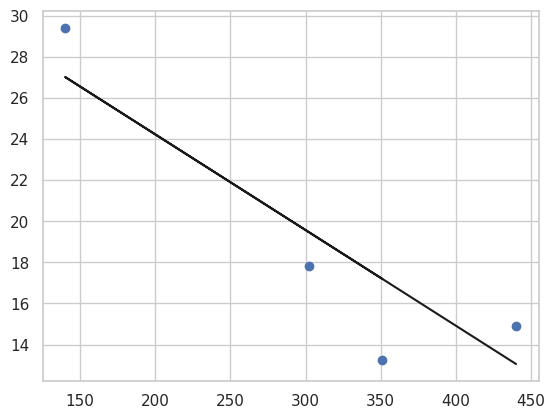

In [71]:
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test_skl)

plt.scatter(X_test_skl, y_test_skl, color ='b')
plt.plot(X_test_skl, y_pred, color ='k')

plt.show()

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_skl, y_pred)
mse = mean_squared_error(y_test_skl, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 2.46
Mean squared error: 6.82
Root mean squared error: 2.61
